<a href="https://colab.research.google.com/github/bognar-dev/AI-ML/blob/main/RandomTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Feb  6 15:22:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import joblib
from statsbombpy import sb

In [ ]:
comp = sb.competitions()
comp['competition_name']
counts = df['column_name'].value_counts()

print(counts)

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


0          1. Bundesliga
1       Champions League
2       Champions League
3       Champions League
4       Champions League
             ...        
65             UEFA Euro
66    UEFA Europa League
67     UEFA Women's Euro
68     Women's World Cup
69     Women's World Cup
Name: competition_name, Length: 70, dtype: object

In [ ]:
def convert_outcome(row):
    if row['WIN_HOME'] == 1:
        return 'win_home'
    elif row['WIN_AWAY'] == 1:
        return 'win_away'
    else:
        return 'draw'

In [ ]:
# Load and preprocess data (replace this with your dataset)
# ...
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('bulidata.csv')
df['outcome'] = df.apply(convert_outcome, axis=1)
df.drop(['WIN_HOME', 'WIN_AWAY','DRAW'], axis=1, inplace=True)
df['outcome']

0       win_home
1       win_home
2           draw
3       win_home
4           draw
          ...   
5503    win_away
5504    win_home
5505        draw
5506    win_home
5507    win_away
Name: outcome, Length: 5508, dtype: object

In [ ]:
# Extract unique locations from the 'LOCATION' column
locations = pd.unique(df['LOCATION'])

# Create a dictionary to map locations to Location_IDs
location_id_map = {location: i for i, location in enumerate(locations)}

# Map each location to its corresponding Location_ID
df['LOCATION_ID'] = df['LOCATION'].map(location_id_map)


print(df.columns)


Index(['Unnamed: 0', 'MATCH_DATE', 'LEAGUE_NAME', 'SEASON', 'LEAGUE',
       'FINISHED', 'LOCATION', 'VIEWER', 'MATCHDAY', 'MATCHDAY_NR',
       'HOME_TEAM_ID', 'HOME_TEAM_NAME', 'HOME_TEAM', 'HOME_ICON',
       'AWAY_TEAM_ID', 'AWAY_TEAM_NAME', 'AWAY_TEAM', 'AWAY_ICON',
       'GOALS_HOME', 'GOALS_AWAY', 'outcome', 'Location_ID', 'LOCATION_ID'],
      dtype='object')


In [ ]:
print(location_id_map)

{'München': 0, 'Köln': 1, 'Duisburg': 2, 'Hamburg': 3, 'Wolfsburg': 4, 'Bremen': 5, 'Hannover': 6, 'Gelsenkirchen': 7, 'Frankfurt': 8, 'Leverkusen': 9, 'Gladbach': 10, 'Dortmund': 11, 'Berlin': 12, 'Kaiserslautern': 13, 'Nürnberg': 14, 'Bielefeld': 15, 'Stuttgart': 16, 'Mainz': 17, 'Cottbus': 18, 'Aachen': 19, 'Bochum': 20, 'Karlsruhe': 21, 'Rostock': 22, 'Sinsheim': 23, 'Freiburg': 24, 'Augsburg': 25, 'Fürth': 26, 'Düsseldorf': 27, 'Braunschweig': 28, 'Paderborn': 29, 'Darmstadt': 30, 'Ingolstadt': 31, 'Leipzig': 32}


In [ ]:
# Features (X) and Target Variable (y)
X = df[['LOCATION_ID', 'MATCHDAY_NR', 'HOME_TEAM_ID', 'AWAY_TEAM_ID','GOALS_HOME','GOALS_AWAY']]
y = df['outcome']  # 'win', 'draw', 'loss'

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

In [ ]:
# Print the accuracy score
print(f"Accuracy: {accuracy}")

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9990925589836661
Confusion Matrix:
[[315   1   0]
 [  0 316   0]
 [  0   0 470]]
Precision: 0.9990954215736231
Recall: 0.9990925589836661
F1-score: 0.9990925567117862


In [ ]:
joblib.dump(model, 'buli_model.pkl')

['buli_model.pkl']

In [ ]:
# Load the trained model from the file
loaded_model = joblib.load('buli_model.pkl')

import pandas as pd

# Define the features for each team (adjust values based on your data)
home_team_features = {
    'LOCATION_ID': [9],     # Numerical value representing the location ID
    'MATCHDAY_NR': [1],    # Numerical value representing the matchday number
    'HOME_TEAM_ID': [6],    # Numerical value representing the home team ID
    'AWAY_TEAM_ID': [16],   # Numerical value representing the away team ID
    'GOALS_HOME': [0],      # Number of goals scored by the home team
    'GOALS_AWAY': [9]       # Number of goals scored by the away team
}

away_team_features = {
    'LOCATION_ID': [9],     # Numerical value representing the location ID
    'MATCHDAY_NR': [10],    # Numerical value representing the matchday number
    'HOME_TEAM_ID': [16],   # Numerical value representing the home team ID (opposite of home team)
    'AWAY_TEAM_ID': [6],    # Numerical value representing the away team ID (opposite of away team)
    'GOALS_HOME': [0],      # Number of goals scored by the home team (opposite of home team)
    'GOALS_AWAY': [0]       # Number of goals scored by the away team (opposite of away team)
}

# Make predictions for the home team
home_team_predictions = loaded_model.predict_proba(pd.DataFrame(home_team_features))
home_team_result = pd.DataFrame({
    'Team': ['Leverkusen'],               # Name of the home team
    'Win Probability': home_team_predictions[0][0],
    'Draw Probability': home_team_predictions[0][1],
    'Loss Probability': home_team_predictions[0][2]
})


result = loaded_model.predict(pd.DataFrame(home_team_features))
resultAway = loaded_model.predict(pd.DataFrame(home_team_features))
print(f"home prediction ${result}")

# Make predictions for the away team
away_team_predictions = loaded_model.predict_proba(pd.DataFrame(away_team_features))
away_team_result = pd.DataFrame({
    'Team': ['Stuttgart'],                # Name of the away team
    'Win Probability': away_team_predictions[0][0],
    'Draw Probability': away_team_predictions[0][1],
    'Loss Probability': away_team_predictions[0][2]
})

# Concatenate the results for both teams
results_df = pd.concat([home_team_result, away_team_result])

# Print the results
print(results_df)



         Team  Win Probability  Draw Probability  Loss Probability
0  Leverkusen             0.00              1.00              0.00
0   Stuttgart             0.93              0.02              0.05


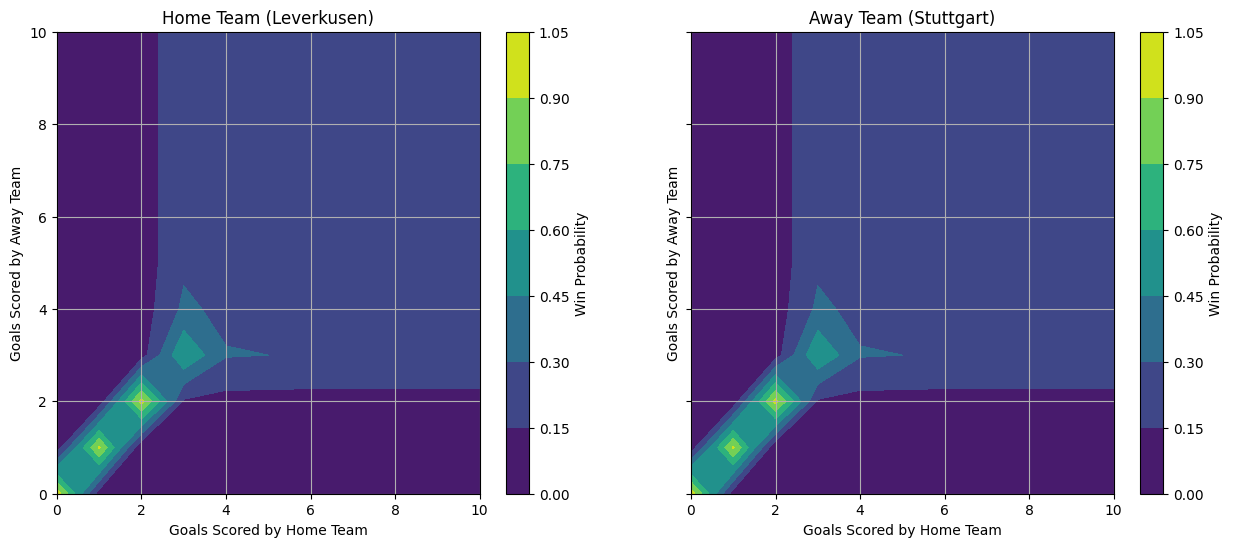

In [ ]:
import numpy as np

# Define the range of goals for each team
goals_range = np.arange(0, 11)  # Assuming the range of goals is from 0 to 10

# Create a grid of all possible goal combinations
home_goals, away_goals = np.meshgrid(goals_range, goals_range)

# Flatten the grid to create all possible combinations
home_goals_flat = home_goals.flatten()
away_goals_flat = away_goals.flatten()

# Predict win probabilities for all combinations
win_probabilities = loaded_model.predict_proba(pd.DataFrame({
    'LOCATION_ID': [9] * len(home_goals_flat),
    'MATCHDAY_NR': [20] * len(home_goals_flat),
    'HOME_TEAM_ID': [6] * len(home_goals_flat),
    'AWAY_TEAM_ID': [16] * len(home_goals_flat),
    'GOALS_HOME': home_goals_flat,
    'GOALS_AWAY': away_goals_flat
}))

# Reshape the win probabilities back to the grid shape
win_probabilities_home = win_probabilities[:, 0].reshape(home_goals.shape)
win_probabilities_away = win_probabilities[:, 0].reshape(away_goals.shape)

# Plot the win probability surfaces for both teams
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# Plot for the home team
axs[0].contourf(home_goals, away_goals, win_probabilities_home, cmap='viridis')
axs[0].set_title('Home Team (Leverkusen)')
axs[0].set_xlabel('Goals Scored by Home Team')
axs[0].set_ylabel('Goals Scored by Away Team')
axs[0].grid(True)

# Plot for the away team
axs[1].contourf(home_goals, away_goals, win_probabilities_away, cmap='viridis')
axs[1].set_title('Away Team (Stuttgart)')
axs[1].set_xlabel('Goals Scored by Home Team')
axs[1].set_ylabel('Goals Scored by Away Team')
axs[1].grid(True)

# Add colorbars
cbar1 = fig.colorbar(axs[0].contourf(home_goals, away_goals, win_probabilities_home, cmap='viridis'), ax=axs[0])
cbar2 = fig.colorbar(axs[1].contourf(home_goals, away_goals, win_probabilities_away, cmap='viridis'), ax=axs[1])

# Set colorbar labels
cbar1.set_label('Win Probability')
cbar2.set_label('Win Probability')

plt.show()


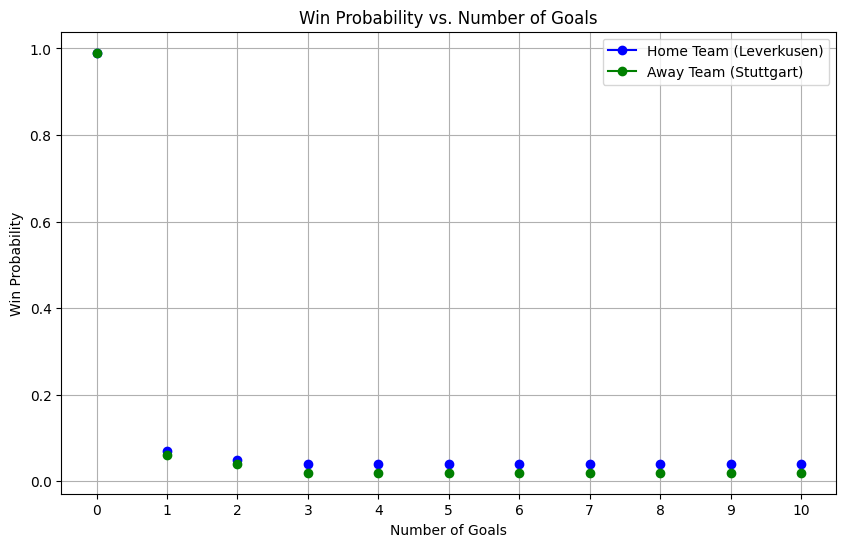

In [ ]:
import numpy as np

# Define the range of goals for each team
goals_range = np.arange(0, 11)  # Assuming the range of goals is from 0 to 10

# Predict win probabilities for each goal separately
win_probabilities_home = []
win_probabilities_away = []

for goal in goals_range:
    # Predict win probabilities for the home team with a specific goal
    game_features_home = pd.DataFrame({
        'LOCATION_ID': [9],     # Numerical value representing the location ID
        'MATCHDAY_NR': [20],    # Numerical value representing the matchday number
        'HOME_TEAM_ID': [6],    # Numerical value representing the home team ID
        'AWAY_TEAM_ID': [16],   # Numerical value representing the away team ID
        'GOALS_HOME': [goal],   # Specific number of goals scored by the home team
        'GOALS_AWAY': [0]       # Number of goals scored by the away team
    })
    win_prob_home = loaded_model.predict_proba(game_features_home)[:, 0]
    win_probabilities_home.append(win_prob_home)

    # Predict win probabilities for the away team with a specific goal
    game_features_away = pd.DataFrame({
        'LOCATION_ID': [9],     # Numerical value representing the location ID
        'MATCHDAY_NR': [20],    # Numerical value representing the matchday number
        'HOME_TEAM_ID': [6],   # Numerical value representing the home team ID (opposite of home team)
        'AWAY_TEAM_ID': [16],    # Numerical value representing the away team ID (opposite of away team)
        'GOALS_HOME': [0],      # Number of goals scored by the home team (opposite of home team)
        'GOALS_AWAY': [goal]    # Specific number of goals scored by the away team
    })
    win_prob_away = loaded_model.predict_proba(game_features_away)[:, 0]
    win_probabilities_away.append(win_prob_away)

# Plot the win probability for each goal
plt.figure(figsize=(10, 6))
for goal, prob_home, prob_away in zip(goals_range, win_probabilities_home, win_probabilities_away):
    plt.plot([goal], [prob_home], marker='o', color='blue')
    plt.plot([goal], [prob_away], marker='o', color='green')

# Set plot labels and title
plt.xlabel('Number of Goals')
plt.ylabel('Win Probability')
plt.title('Win Probability vs. Number of Goals')
plt.xticks(goals_range)
plt.grid(True)

# Add legend
plt.legend(['Home Team (Leverkusen)', 'Away Team (Stuttgart)'])

# Show plot
plt.show()
